In [85]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import streamlit as st

In [51]:
# Read JSON
df = pd.read_json("pakwheels_10_pages.json", lines=True)

# Check first few rows
print(df.head())

                                           title  ratings           price  \
0     Toyota Land Cruiser  2022 AX 3.5L for Sale      NaN   PKR 5.3 crore   
1   Toyota Prado  2018 TX L Package 2.7 for Sale      NaN  PKR 2.45 crore   
2                   Toyota Aqua  2013 S for Sale      NaN   PKR 32.8 lacs   
3   Audi e-tron  2021 50 quattro 230 kW for Sale      NaN  PKR 1.52 crore   
4  Changan Alsvin  2024 1.3L MT Comfort for Sale      NaN     PKR 38 lacs   

   year     mileage      fuel    engine transmission      grade  
0  2022    9,264 km    Petrol   3500 cc    Automatic       None  
1  2018   63,040 km    Petrol   2700 cc    Automatic  4.5 Grade  
2  2013  105,000 km    Hybrid   1500 cc    Automatic       None  
3  2021   30,246 km  Electric  60.0 kWh    Automatic       None  
4  2024    9,518 km    Petrol   1300 cc       Manual       None  


In [52]:
df = pd.DataFrame(df)
df

,title,ratings,price,year,mileage,fuel,engine,transmission,grade
0,Toyota Land Cruiser 2022 AX 3.5L for Sale,NaN,PKR 5.3 crore,2022,"9,264 km",Petrol,3500 cc,Automatic,None
1,Toyota Prado 2018 TX L Package 2.7 for Sale,NaN,PKR 2.45 crore,2018,"63,040 km",Petrol,2700 cc,Automatic,4.5 Grade
2,Toyota Aqua 2013 S for Sale,NaN,PKR 32.8 lacs,2013,"105,000 km",Hybrid,1500 cc,Automatic,None
3,Audi e-tron 2021 50 quattro 230 kW for Sale,NaN,PKR 1.52 crore,2021,"30,246 km",Electric,60.0 kWh,Automatic,None
4,Changan Alsvin 2024 1.3L MT Comfort for Sale,NaN,PKR 38 lacs,2024,"9,518 km",Petrol,1300 cc,Manual,None
...,...,...,...,...,...,...,...,...,...
288,Toyota Platz 2022 for Sale,NaN,PKR 14 lacs,2022,"220,866 km",Petrol,1000 cc,Automatic,None
289,Audi A4 4th (B8) Generation 2014 1.8 TFSI for ...,NaN,PKR 70 lacs,2014,"48,000 km",Petrol,1800 cc,Automatic,None
290,Daihatsu Terios Kid 2001 for Sale,NaN,PKR 15.25 lacs,2001,"166,659 km",Petrol,660 cc,Automatic,None
291,Toyota Corolla 2025 Altis X CVT-i 1.8 for Sale,NaN,PKR 45 lacs,2025,"63,000 km",Petrol,1800 cc,Automatic,None


In [53]:
df.isnull().sum()

title             0
ratings         293
price             0
year              0
mileage           0
fuel              0
engine            0
transmission      0
grade           265
dtype: int64

In [56]:
df = df.drop('grade', axis=1)
df

,title,price,year,mileage,fuel,engine,transmission
0,Toyota Land Cruiser 2022 AX 3.5L for Sale,PKR 5.3 crore,2022,"9,264 km",Petrol,3500 cc,Automatic
1,Toyota Prado 2018 TX L Package 2.7 for Sale,PKR 2.45 crore,2018,"63,040 km",Petrol,2700 cc,Automatic
2,Toyota Aqua 2013 S for Sale,PKR 32.8 lacs,2013,"105,000 km",Hybrid,1500 cc,Automatic
3,Audi e-tron 2021 50 quattro 230 kW for Sale,PKR 1.52 crore,2021,"30,246 km",Electric,60.0 kWh,Automatic
4,Changan Alsvin 2024 1.3L MT Comfort for Sale,PKR 38 lacs,2024,"9,518 km",Petrol,1300 cc,Manual
...,...,...,...,...,...,...,...
288,Toyota Platz 2022 for Sale,PKR 14 lacs,2022,"220,866 km",Petrol,1000 cc,Automatic
289,Audi A4 4th (B8) Generation 2014 1.8 TFSI for ...,PKR 70 lacs,2014,"48,000 km",Petrol,1800 cc,Automatic
290,Daihatsu Terios Kid 2001 for Sale,PKR 15.25 lacs,2001,"166,659 km",Petrol,660 cc,Automatic
291,Toyota Corolla 2025 Altis X CVT-i 1.8 for Sale,PKR 45 lacs,2025,"63,000 km",Petrol,1800 cc,Automatic


In [59]:
# Price column (e.g., "PKR 5.3 crore", "PKR 32.8 lacs")
def price_to_numeric(price):
    try:
        if pd.isnull(price):
            return None
        price = str(price).replace('PKR','').strip()
        if 'crore' in price.lower():
            return float(price.lower().replace('crore','').strip()) * 1e7
        elif 'lacs' in price.lower():
            return float(price.lower().replace('lacs','').strip()) * 1e5
        else:
            return float(price.replace(',',''))
    except:
        return None  # agar conversion fail ho to None return kare

In [60]:
df['price'] = df['price'].apply(price_to_numeric)
# Mileage column (e.g., "9,264 km")
df['mileage'] = df['mileage'].str.replace('km','').str.replace(',','').astype(float)

# Engine column (e.g., "3500 cc", "60.0 kWh")
df['engine'] = df['engine'].str.extract(r'([0-9\.]+)').astype(float)

# Year column to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [63]:
df = df.dropna()

In [64]:
df

,title,price,year,mileage,fuel,engine,transmission
0,Toyota Land Cruiser 2022 AX 3.5L for Sale,53000000.0,2022,9264.0,Petrol,3500.0,Automatic
1,Toyota Prado 2018 TX L Package 2.7 for Sale,24500000.0,2018,63040.0,Petrol,2700.0,Automatic
2,Toyota Aqua 2013 S for Sale,3280000.0,2013,105000.0,Hybrid,1500.0,Automatic
3,Audi e-tron 2021 50 quattro 230 kW for Sale,15200000.0,2021,30246.0,Electric,60.0,Automatic
4,Changan Alsvin 2024 1.3L MT Comfort for Sale,3800000.0,2024,9518.0,Petrol,1300.0,Manual
...,...,...,...,...,...,...,...
288,Toyota Platz 2022 for Sale,1400000.0,2022,220866.0,Petrol,1000.0,Automatic
289,Audi A4 4th (B8) Generation 2014 1.8 TFSI for ...,7000000.0,2014,48000.0,Petrol,1800.0,Automatic
290,Daihatsu Terios Kid 2001 for Sale,1525000.0,2001,166659.0,Petrol,660.0,Automatic
291,Toyota Corolla 2025 Altis X CVT-i 1.8 for Sale,4500000.0,2025,63000.0,Petrol,1800.0,Automatic


In [65]:
df.isnull().sum()

title           0
price           0
year            0
mileage         0
fuel            0
engine          0
transmission    0
dtype: int64

In [66]:
df.to_csv('cleaned_car_data.csv', index=False)
print("Data saved to 'cleaned_car_data.csv'")

Data saved to 'cleaned_car_data.csv'


In [67]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 292
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         292 non-null    object 
 1   price         292 non-null    float64
 2   year          292 non-null    int64  
 3   mileage       292 non-null    float64
 4   fuel          292 non-null    object 
 5   engine        292 non-null    float64
 6   transmission  292 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 18.2+ KB
None
              price         year        mileage       engine
count  2.920000e+02   292.000000     292.000000   292.000000
mean   4.201558e+06  2014.616438   83079.421233  1310.719178
std    5.117015e+06     7.851509   56580.686026   609.755303
min    1.000000e+05  1978.000000       1.000000    60.000000
25%    1.725000e+06  2011.000000   45368.750000  1000.000000
50%    3.050000e+06  2016.000000   79250.000000  1300.000000
75%    4.560000e+06

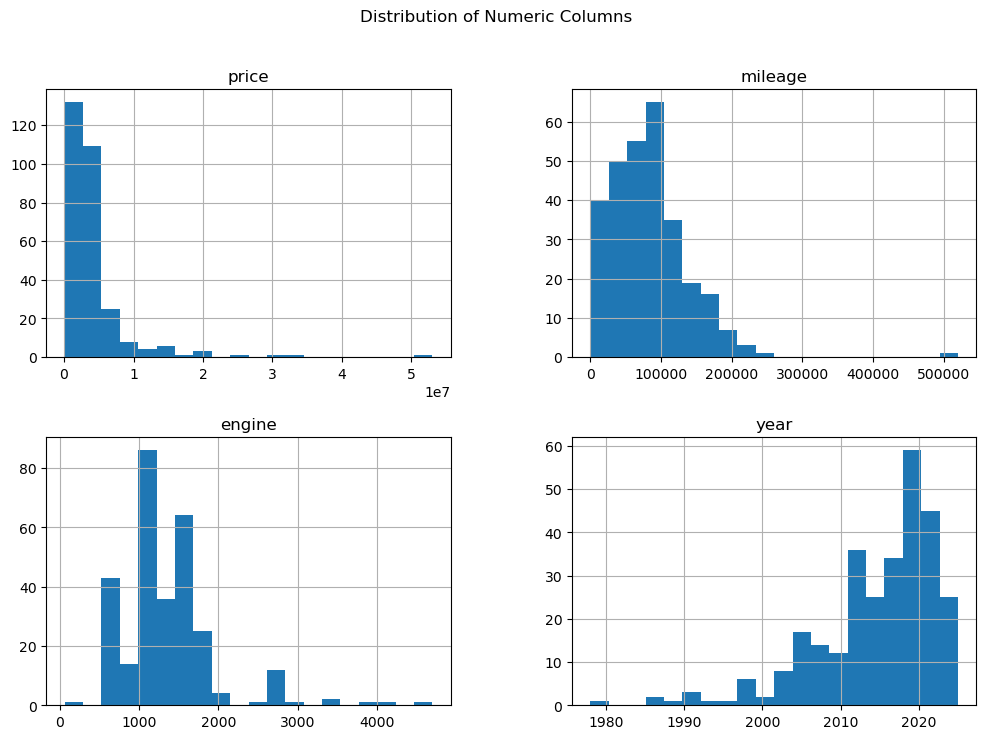

In [68]:
numeric_cols = ['price','mileage','engine','year']
df[numeric_cols].hist(bins=20, figsize=(12,8))
plt.suptitle('Distribution of Numeric Columns')
plt.show()

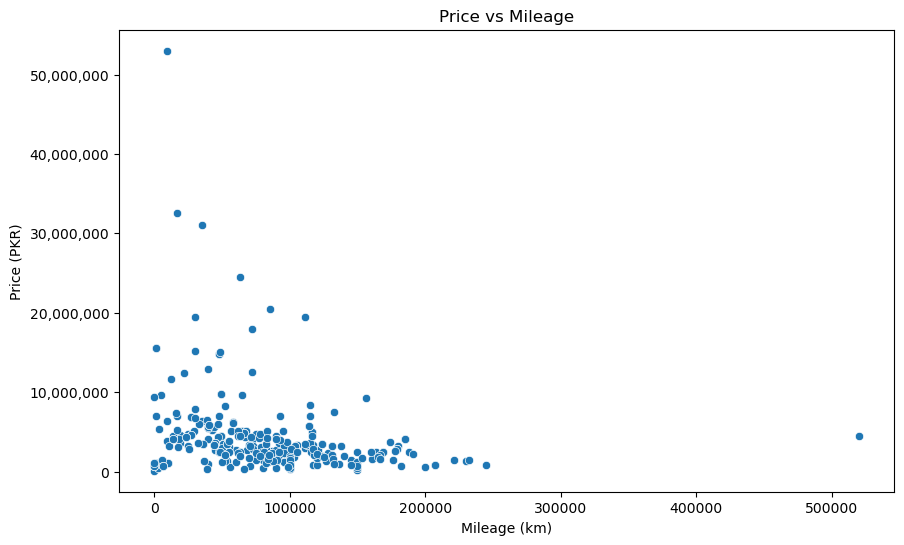

In [76]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Price vs Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (PKR)')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

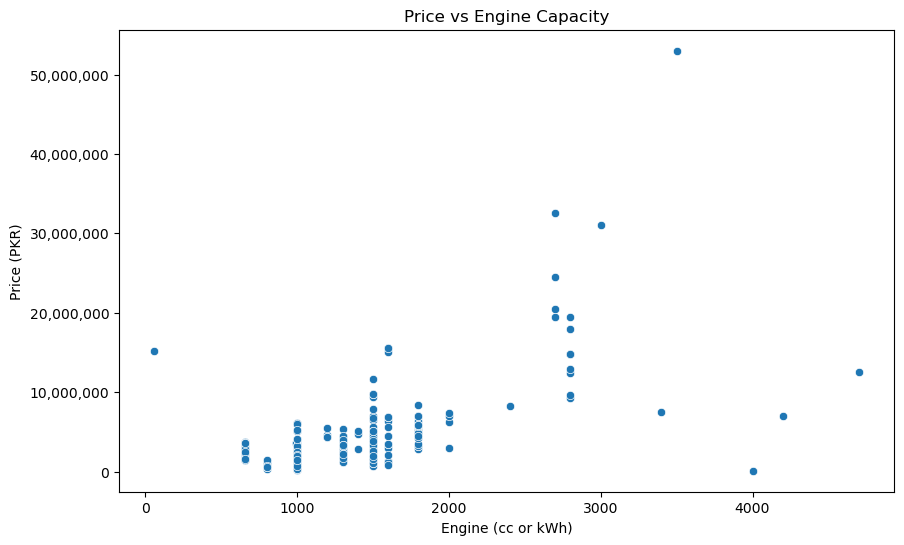

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='engine', y='price', data=df)
plt.title('Price vs Engine Capacity')
plt.xlabel('Engine (cc or kWh)')
plt.ylabel('Price (PKR)')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7956\1741944450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='viridis')


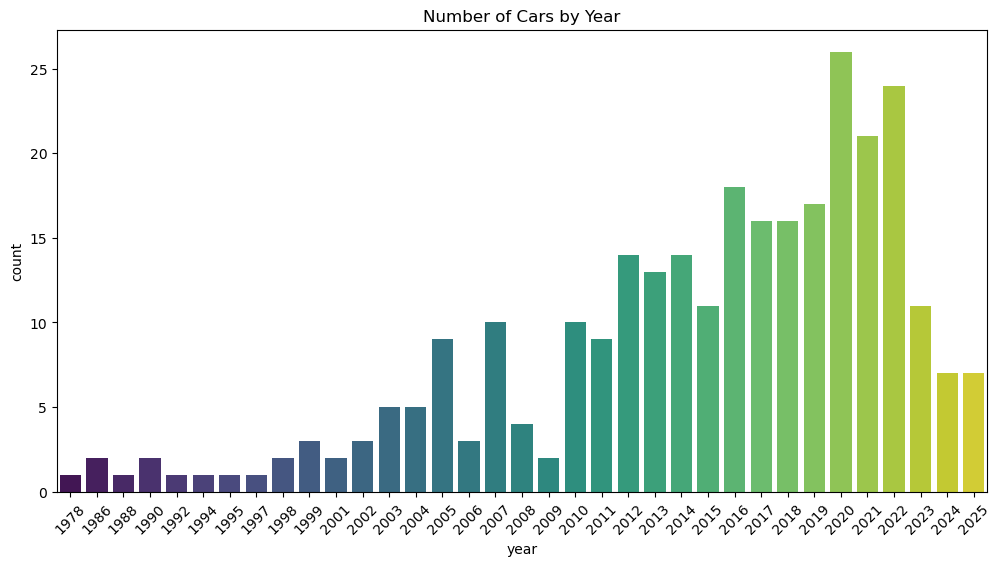

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Number of Cars by Year')
plt.xticks(rotation=45)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7956\3288808087.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='magma')


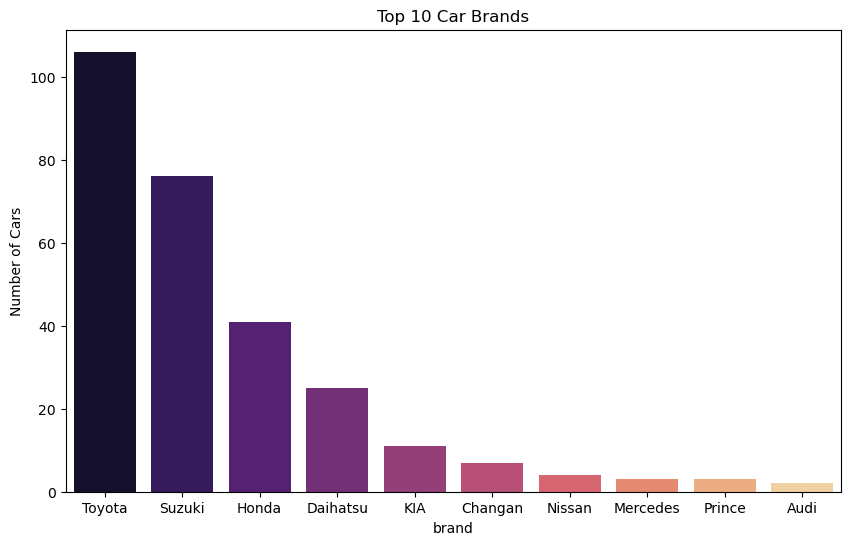

In [73]:
df['brand'] = df['title'].str.split(' ').str[0]  # first word as brand
top_brands = df['brand'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='magma')
plt.title('Top 10 Car Brands')
plt.ylabel('Number of Cars')
plt.show()

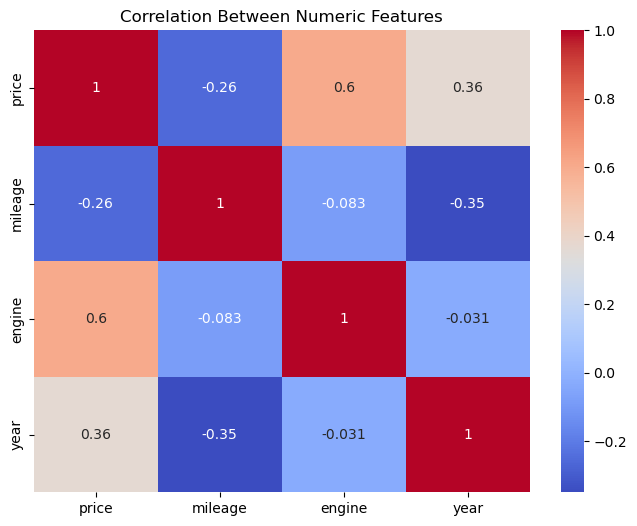

In [74]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()

In [80]:
st.title("Car Dataset EDA & Visualization")

# Load Data
@st.cache_data
def load_data():
    df = pd.read_csv('./cleaned_car_data.csv')
    return df

df = load_data()

# Show raw data
st.subheader("Raw Data")
st.dataframe(df.head(50))  # first 50 rows

# Show dataset info
st.subheader("Dataset Info")
st.write(df.info())
st.write(df.describe())


2025-11-16 19:34:36.701 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-16 19:34:37.194 
  command:

    streamlit run c:\Users\USER\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-11-16 19:34:37.196 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-16 19:34:37.199 No runtime found, using MemoryCacheStorageManager
2025-11-16 19:34:37.206 No runtime found, using MemoryCacheStorageManager
2025-11-16 19:34:37.208 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-16 19:34:37.210 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-16 19:34:37.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-16 19:34:37.294 Th

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         292 non-null    object 
 1   price         292 non-null    float64
 2   year          292 non-null    int64  
 3   mileage       292 non-null    float64
 4   fuel          292 non-null    object 
 5   engine        292 non-null    float64
 6   transmission  292 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 16.1+ KB
